# Задание 10.

Вам предоставлен набор данных по качеству воздуха в китайских городах в виде csv файлов.
Основная метрика, которая показывает качество воздуха - PM25(<a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4740125/'>подробнее о PM25</a>), указана в колонках, которые начинаются на PM_.
Остальные столбцы содержат либо данные о времени, в которое были произведены измерения, либо данные о погоде в этот момент. DEWP - точка росы, HUMI - влажность, PRES - давление, TEMP - температура, cbwd - направление ветра, Iws - его скорость, precipation - осадки, Iprec - накопленные осадки.

Для выполнения задания необходимо ответить на вопросы по данным, заполнив ячейки ноутбука. Сам ноутбук необходимо выложить в виде отдельного репозитория на github. Ссылку для клонирования репозитория необходимо приложить в решение задания.

## 1. Загрузите в виде DataFrame набор данных по качеству воздуха Пекина
Ссылка на набор данных: https://disk.yandex.ru/d/1UKJoV1ULW1NLQ

In [96]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('BeijingPM20100101_20151231.csv')

df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


## 2. Сколько всего строк находится в наборе данных?

In [7]:
len(df.index)

52584

## 3. Сколько измерений уровня загрязнения воздуха находится в наборе данных?

In [9]:
df = df.dropna(subset = ['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post'])

In [11]:
df.shape[0]

19380

## 4. Введите столбец среднего качества воздуха PM_mean с усреднением показаний со всех станций слежения.

In [22]:
df['PM_mean'] = df.loc[:,('PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post')].mean(axis = 1)

C:\Users\kolom\AppData\Local\Temp/ipykernel_9272/3136898942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PM_mean'] = df.loc[:,('PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post')].mean(axis = 1)


In [40]:
df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM_mean
27824,27825,2013,3,5,8,1,117.0,166.0,140.0,150.0,-6.0,59.0,1019.0,1.0,cv,0.89,0.0,0.0,143.25
27825,27826,2013,3,5,9,1,131.0,165.0,152.0,163.0,-8.0,38.0,1019.0,5.0,cv,1.78,0.0,0.0,152.75
27826,27827,2013,3,5,10,1,141.0,173.0,128.0,172.0,-8.0,31.0,1018.0,8.0,cv,2.67,0.0,0.0,153.50
27828,27829,2013,3,5,12,1,169.0,182.0,3.0,181.0,-9.0,23.0,1017.0,11.0,cv,4.45,0.0,0.0,133.75
27829,27830,2013,3,5,13,1,169.0,169.0,3.0,187.0,-9.0,22.0,1015.0,12.0,cv,5.34,0.0,0.0,132.00


## 5. Какое направление ветра преобладает в Пекине?

In [37]:
df.cbwd.value_counts().idxmax()

'SE'

## 6. В какой день качество воздуха является наихудшим(самая большая концентрация частиц)? Вывести дату в типе данных datetime стандартной библиотеки Python.

In [47]:
dirt_day = df.loc[df.PM_mean.idxmax(),['year','month','day','hour']]

datetime.datetime(year = dirt_day.year,month = dirt_day.month,day = dirt_day.day,hour = dirt_day.hour)

datetime.datetime(2014, 2, 14, 23, 0)

## 7. Какой из сезонов в Пекине в среднем наименее неблагоприятный для легких за последние 2 года наблюдений?

In [56]:
df_14_15 = df.loc[(df.year == 2015) | (df.year == 2014),:]
df_14_15.groupby('season').mean().PM_mean.idxmax()

4

## 8. Коррелирует ли влажность с качеством воздуха?
Можно воспользоваться корреляцией Пирсона из numpy, а также встроенными функциями Pandas.

In [59]:
df.loc[:,['HUMI','PM_mean']].corr()

,HUMI,PM_mean
HUMI,1.00000,0.38438
PM_mean,0.38438,1.00000


# Между влажностью воздуха и и его качеством присутсвует салая положительная коредяция

## 9. Какой из сезонов в Пекине самый дождливый(в среднем по накоплению осадков)?

In [63]:
df.groupby('season').mean().Iprec.idxmax()

2

## 10. Становится ли качество воздуха во время дождя лучше, чем оно было сразу перед дождем?

In [87]:
PM_before_rain = []
mean_PM_in_rain = []
before_rain = 0
rain = []

df = df.dropna(subset = ['precipitation'])


for idx in df.index:
    if df.loc[idx,'precipitation'] == 0 and len(rain) == 0:
        before_rain = df.loc[idx,'PM_mean']
    if df.loc[idx,'precipitation'] != 0:
        rain.append(df.loc[idx,'PM_mean'])
    if df.loc[idx,'precipitation'] == 0 and len(rain) != 0:
        PM_before_rain.append(before_rain)
        mean_PM_in_rain.append(np.mean(rain))
        rain = []



In [91]:
data_rain = pd.DataFrame({'PM_before_rain':PM_before_rain,'PM_in_rain':mean_PM_in_rain})
data_rain

,PM_before_rain,PM_in_rain
0,129.00,134.944444
1,131.50,140.250000
2,48.00,47.181818
3,79.00,75.125000
4,79.00,97.750000
...,...,...
227,63.50,43.625000
228,15.75,16.000000
229,36.25,60.125000
230,14.75,15.333333


<AxesSubplot:>

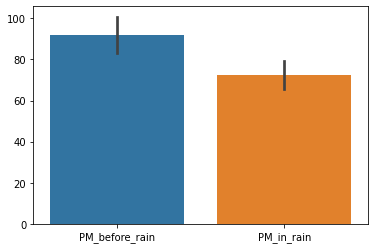

In [97]:
sns.barplot(data = data_rain)

# По графику видно, что качество воздуха улучшается во время дождя по сравнению с тем, какое качество непосредственно до него